In [1]:
# data load
import pprint as pp
import pandas as pd
from tqdm import tqdm


# line 727/728 of train is broken, need new line
# valid_df = pd.read_csv('data/valid/data1.csv')
# train_df = pd.read_csv('data/train/data_7000_new.csv', header=None)

def load(path: str) -> list:
    data = []
    with open(path) as reader:
        for i, line in enumerate(reader):
            splits = line.replace('\n', '').split(',')
            data.append(splits)
    return data


valid_df = pd.DataFrame(data=load('data/valid/data1.csv')[1:])
train_df = pd.DataFrame(data=load('data/train/data_7000_new.csv'))

# show scales
for i in range(4, 9):
    pp.pprint(pd.concat([
        train_df[train_df.columns[i]].drop_duplicates(),
        valid_df[valid_df.columns[i]].drop_duplicates()
    ]).drop_duplicates())

funny = {
    'hilarious': 3,
    'very_funny': 2,
    'funny': 1,
    'not_funny': 0
}

sarcasm = {
    'general': 1,
    'not_sarcastic': 0,
    'twisted_meaning': 2,
    'very_twisted': 3
}

offensive = {
    'hateful_offensive': 3,
    'very_offensive': 2,
    'slight': 1,
    'not_offensive': 0,
}

motivation = {
    'motivational': 1,
    'not_motivational': 0}

positive = {
    'very_positive': 4,
    'positive': 3,
    'neutral': 2,
    'negative': 1,
    'very_negative': 0}


0     hilarious
1     not_funny
2    very_funny
8         funny
Name: 4, dtype: object
0            general
2      not_sarcastic
3    twisted_meaning
4       very_twisted
Name: 5, dtype: object
0          not_offensive
3         very_offensive
5                 slight
148    hateful_offensive
Name: 6, dtype: object
0    not_motivational
1        motivational
Name: 7, dtype: object
0     very_positive
2          positive
4           neutral
5          negative
14    very_negative
Name: 8, dtype: object


In [2]:
import re
sentences2=[sent for sent in train_df[3]]
sent2_val=[sent for sent in valid_df[2]]

cleaned_sent=[]
cleaned_sent_val=[]

for s in sentences2:
    k=re.search(r'\d{1,2}:\d{2} (AM|PM)', s)
    if k is not None:
        ind=k.span()[0]
        new_cleaned_s=s[0:ind]
        cleaned_sent.append(new_cleaned_s)
    else:
        cleaned_sent.append(s)

for s in sent2_val:
    k=re.search(r'\d{1,2}:\d{2} (AM|PM)', s)
    if k is not None:
        ind=k.span()[0]
        new_cleaned_s=s[0:ind]
        cleaned_sent_val.append(new_cleaned_s)
    else:
        cleaned_sent_val.append(s)



In [3]:
labels=[positive[label] for label in train_df[8]]
labels_val=[positive[label] for label in valid_df[8]]
print(len(labels))
print(len(labels_val))


7000
1000


In [4]:
import preprocessor as p
cleaned_2=[]
cleaned_val=[]
for doc in cleaned_sent:
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)
    cleaned_tweet=p.clean(doc)
    cleaned_2.append(cleaned_tweet)
    
for doc in cleaned_sent_val:
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)
    cleaned_tweet=p.clean(doc)
    cleaned_val.append(cleaned_tweet)
    
    

In [5]:
print(cleaned_2[0])
print(cleaned_2[1])
print(cleaned_2[2])
print("\n")
print(cleaned_sent[0])
print(cleaned_sent[1])
print(cleaned_sent[2])



print(cleaned_val[0])
print(cleaned_val[1])
print(cleaned_val[2])
print("\n")
print(cleaned_sent_val[0])
print(cleaned_sent_val[1])
print(cleaned_sent_val[2])

LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE YEARS CHALLENGE AT FACEBOOK imgflip.com
The best of #10 YearChallenge! Completed in less the years. Kudus to ji
Sam Thorne ( Follow Follow Saw everyone posting these vs pics so here's mine


LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK imgflip.com 
The best of #10 YearChallenge! Completed in less the 4 years. Kudus to @narendramodi ji 
Sam Thorne @Strippin ( Follow Follow Saw everyone posting these 2009 vs 2019 pics so here's mine 
ISAW DAD WITH MOM LASTNIGHT I THINK HE WAS STEALING MY MILK. quickmeme.com
HOW AM I STILL BREATHING IF SHE HAS MY NOSE? quinne.com
YOU MEAN TO TELL ME BIGG BOSSIS BETTER THAN KBC!!! The original photo


ISAW DAD WITH MOM LASTNIGHT I THINK HE WAS STEALING MY MILK. quickmeme.com 
HOW AM I STILL BREATHING IF SHE HAS MY NOSE? quinne.com 
YOU MEAN TO TELL ME BIGG BOSSIS BETTER THAN KBC!!! The original photo 


In [6]:
import string
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words=set(stopwords.words('english'))
words_clean=[]
words_clean_val=[]
for doc in cleaned_2:
    #to remove punctuation using puncutation marks defined in the string library
    doc_clean=doc.translate(str.maketrans('','', string.punctuation))
    #to remove numbers
    doc_clean=doc_clean.translate(str.maketrans('','', '0123456789'))
    #tokenize the reviews using nltk library and make them lowercase
    wordlist=word_tokenize(doc_clean.lower())
    new_word_list=[]
    for word in wordlist:
        if word not in stop_words:
            new_word_list.append(word)
    words_clean.append(new_word_list)
    
for doc in cleaned_val:
    #to remove punctuation using puncutation marks defined in the string library
    doc_clean=doc.translate(str.maketrans('','', string.punctuation))
    #to remove numbers
    doc_clean=doc_clean.translate(str.maketrans('','', '0123456789'))
    #tokenize the reviews using nltk library and make them lowercase
    wordlist=word_tokenize(doc_clean.lower())
    new_word_list=[]
    for word in wordlist:
        if word not in stop_words:
            new_word_list.append(word)
    words_clean_val.append(new_word_list)


[nltk_data] Downloading package stopwords to /home/eric/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/eric/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable

In [8]:
input_embedding_size=50
hidden_size=300
output_size=5
sequence_length=19
# my_input.view(1, 1, -1)
my_lstm=nn.LSTM(input_embedding_size,hidden_size,sequence_length)
my_dense=nn.Linear(hidden_size,output_size)
# lstm_model=MyLSTM(embedding_size, hidden_size,output_size)
my_lstm.cuda()
my_dense.cuda()

Linear(in_features=300, out_features=5, bias=True)

In [9]:
import pickle as p
import os

weights_matrix = p.load(open('glove_pretrained/glove.twitter.27B/27B.50_weightMatrix.pkl', 'rb'))
weight_indcs = p.load(open('glove_pretrained/glove.twitter.27B/27B.50_weight_indexes.pkl', 'rb'))
print("done")

done


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
# import numpy as np

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

  1%|          | 1/100 [00:03<06:10,  3.74s/it]

in epoch 0 print 1.4563742677370708


  2%|▏         | 2/100 [00:07<06:11,  3.79s/it]

in epoch 1 print 1.2840967575709026


  3%|▎         | 3/100 [00:11<06:12,  3.84s/it]

in epoch 2 print 1.2796609997749329


  4%|▍         | 4/100 [00:15<06:11,  3.87s/it]

in epoch 3 print 1.274989624818166


  5%|▌         | 5/100 [00:19<06:09,  3.89s/it]

in epoch 4 print 1.2696515520413716


  6%|▌         | 6/100 [00:23<06:06,  3.90s/it]

in epoch 5 print 1.2762176990509033


  7%|▋         | 7/100 [00:27<06:04,  3.92s/it]

in epoch 6 print 1.2688578963279724


  8%|▊         | 8/100 [00:31<06:01,  3.93s/it]

in epoch 7 print 1.27578604221344


  9%|▉         | 9/100 [00:35<05:58,  3.94s/it]

in epoch 8 print 1.2725929617881775


 10%|█         | 10/100 [00:39<05:54,  3.94s/it]

in epoch 9 print 1.2710132797559102


 11%|█         | 11/100 [00:43<05:50,  3.94s/it]

in epoch 10 print 1.2745555241902669


 12%|█▏        | 12/100 [00:47<05:46,  3.94s/it]

in epoch 11 print 1.2702365517616272


 13%|█▎        | 13/100 [00:51<05:43,  3.95s/it]

in epoch 12 print 1.2698304653167725


 14%|█▍        | 14/100 [00:55<05:39,  3.95s/it]

in epoch 13 print 1.271292507648468


 15%|█▌        | 15/100 [00:58<05:36,  3.96s/it]

in epoch 14 print 1.2669587930043538


 16%|█▌        | 16/100 [01:02<05:32,  3.96s/it]

in epoch 15 print 1.2726563215255737


 17%|█▋        | 17/100 [01:06<05:28,  3.96s/it]

in epoch 16 print 1.2697883049647014


 18%|█▊        | 18/100 [01:10<05:24,  3.96s/it]

in epoch 17 print 1.273624877134959


 19%|█▉        | 19/100 [01:14<05:20,  3.95s/it]

in epoch 18 print 1.2685909668604534


 20%|██        | 20/100 [01:18<05:17,  3.96s/it]

in epoch 19 print 1.2678923606872559


 21%|██        | 21/100 [01:22<05:11,  3.95s/it]

in epoch 20 print 1.271878957748413


 22%|██▏       | 22/100 [01:26<05:06,  3.93s/it]

in epoch 21 print 1.2676233251889546


 23%|██▎       | 23/100 [01:30<05:02,  3.93s/it]

in epoch 22 print 1.2692420879999797


 24%|██▍       | 24/100 [01:34<04:57,  3.92s/it]

in epoch 23 print 1.2740087906519573


 25%|██▌       | 25/100 [01:38<04:53,  3.91s/it]

in epoch 24 print 1.2716813882191975


 26%|██▌       | 26/100 [01:42<04:48,  3.90s/it]

in epoch 25 print 1.2719898223876953


 27%|██▋       | 27/100 [01:46<04:44,  3.90s/it]

in epoch 26 print 1.271252691745758


 28%|██▊       | 28/100 [01:49<04:41,  3.90s/it]

in epoch 27 print 1.2712113658587139


 29%|██▉       | 29/100 [01:53<04:37,  3.90s/it]

in epoch 28 print 1.2687350710233052


 30%|███       | 30/100 [01:57<04:33,  3.90s/it]

in epoch 29 print 1.2679695685704548


 31%|███       | 31/100 [02:01<04:29,  3.90s/it]

in epoch 30 print 1.2704271078109741


 32%|███▏      | 32/100 [02:05<04:25,  3.90s/it]

in epoch 31 print 1.2700559099515278


 33%|███▎      | 33/100 [02:09<04:21,  3.90s/it]

in epoch 32 print 1.2667538523674011


 34%|███▍      | 34/100 [02:13<04:17,  3.90s/it]

in epoch 33 print 1.2739172180493672


 35%|███▌      | 35/100 [02:17<04:13,  3.90s/it]

in epoch 34 print 1.2718072533607483


 36%|███▌      | 36/100 [02:21<04:09,  3.90s/it]

in epoch 35 print 1.27288818359375


 37%|███▋      | 37/100 [02:25<04:05,  3.90s/it]

in epoch 36 print 1.2745534777641296


 38%|███▊      | 38/100 [02:28<04:01,  3.90s/it]

in epoch 37 print 1.2727139989535015


 39%|███▉      | 39/100 [02:32<03:57,  3.90s/it]

in epoch 38 print 1.27253125111262


 40%|████      | 40/100 [02:36<03:53,  3.90s/it]

in epoch 39 print 1.2682168285051982


 41%|████      | 41/100 [02:40<03:50,  3.90s/it]

in epoch 40 print 1.2707919279734294


 42%|████▏     | 42/100 [02:44<03:46,  3.90s/it]

in epoch 41 print 1.2724170287450154


 43%|████▎     | 43/100 [02:48<03:42,  3.90s/it]

in epoch 42 print 1.2713728944460552


 44%|████▍     | 44/100 [02:52<03:38,  3.90s/it]

in epoch 43 print 1.2729232708613079


 45%|████▌     | 45/100 [02:56<03:34,  3.89s/it]

in epoch 44 print 1.2712541222572327


 46%|████▌     | 46/100 [03:00<03:30,  3.89s/it]

in epoch 45 print 1.275072495142619


 47%|████▋     | 47/100 [03:04<03:26,  3.90s/it]

in epoch 46 print 1.2735267480214436


 48%|████▊     | 48/100 [03:07<03:22,  3.90s/it]

in epoch 47 print 1.271845817565918


 49%|████▉     | 49/100 [03:11<03:18,  3.90s/it]

in epoch 48 print 1.268609344959259


 50%|█████     | 50/100 [03:15<03:14,  3.89s/it]

in epoch 49 print 1.271855096022288


 51%|█████     | 51/100 [03:19<03:10,  3.89s/it]

in epoch 50 print 1.2721265157063801


 52%|█████▏    | 52/100 [03:23<03:06,  3.89s/it]

in epoch 51 print 1.267225702603658


 53%|█████▎    | 53/100 [03:27<03:03,  3.90s/it]

in epoch 52 print 1.274422566095988


 54%|█████▍    | 54/100 [03:31<02:59,  3.90s/it]

in epoch 53 print 1.2719351053237915


 55%|█████▌    | 55/100 [03:35<02:55,  3.90s/it]

in epoch 54 print 1.270300606886546


 56%|█████▌    | 56/100 [03:39<02:51,  3.89s/it]

in epoch 55 print 1.273444930712382


 57%|█████▋    | 57/100 [03:43<02:47,  3.90s/it]

in epoch 56 print 1.2706012328465779


 58%|█████▊    | 58/100 [03:46<02:43,  3.90s/it]

in epoch 57 print 1.2710683743158977


 59%|█████▉    | 59/100 [03:50<02:39,  3.90s/it]

in epoch 58 print 1.276249368985494


 60%|██████    | 60/100 [03:54<02:35,  3.89s/it]

in epoch 59 print 1.2708121538162231


 61%|██████    | 61/100 [03:58<02:31,  3.90s/it]

in epoch 60 print 1.273966908454895


 62%|██████▏   | 62/100 [04:02<02:28,  3.90s/it]

in epoch 61 print 1.2736405928929646


 63%|██████▎   | 63/100 [04:06<02:24,  3.90s/it]

in epoch 62 print 1.2732790112495422


 64%|██████▍   | 64/100 [04:10<02:20,  3.90s/it]

in epoch 63 print 1.269024133682251


 65%|██████▌   | 65/100 [04:14<02:16,  3.90s/it]

in epoch 64 print 1.270836611588796


 66%|██████▌   | 66/100 [04:18<02:12,  3.90s/it]

in epoch 65 print 1.2708824276924133


 67%|██████▋   | 67/100 [04:21<02:08,  3.89s/it]

in epoch 66 print 1.270351529121399


 68%|██████▊   | 68/100 [04:25<02:04,  3.90s/it]

in epoch 67 print 1.2731414039929707


 69%|██████▉   | 69/100 [04:29<02:00,  3.90s/it]

in epoch 68 print 1.2763410409291585


 70%|███████   | 70/100 [04:33<01:56,  3.90s/it]

in epoch 69 print 1.26866618792216


 71%|███████   | 71/100 [04:37<01:53,  3.90s/it]

in epoch 70 print 1.2746735215187073


 72%|███████▏  | 72/100 [04:41<01:49,  3.90s/it]

in epoch 71 print 1.2721412976582844


 73%|███████▎  | 73/100 [04:45<01:45,  3.90s/it]

in epoch 72 print 1.2671547333399455


 74%|███████▍  | 74/100 [04:49<01:41,  3.90s/it]

in epoch 73 print 1.2759389281272888


 75%|███████▌  | 75/100 [04:53<01:37,  3.90s/it]

in epoch 74 print 1.2710925738016765


 76%|███████▌  | 76/100 [04:57<01:33,  3.89s/it]

in epoch 75 print 1.2678536375363667


 77%|███████▋  | 77/100 [05:00<01:29,  3.90s/it]

in epoch 76 print 1.2689716617266338


 78%|███████▊  | 78/100 [05:04<01:25,  3.90s/it]

in epoch 77 print 1.2720138827959697


 79%|███████▉  | 79/100 [05:08<01:21,  3.90s/it]

in epoch 78 print 1.2725761731465657


 80%|████████  | 80/100 [05:12<01:17,  3.90s/it]

in epoch 79 print 1.2716811895370483


 81%|████████  | 81/100 [05:16<01:14,  3.90s/it]

in epoch 80 print 1.2663817803064983


 82%|████████▏ | 82/100 [05:20<01:10,  3.90s/it]

in epoch 81 print 1.2696720163027446


 83%|████████▎ | 83/100 [05:24<01:06,  3.90s/it]

in epoch 82 print 1.2731628219286601


 84%|████████▍ | 84/100 [05:28<01:02,  3.90s/it]

in epoch 83 print 1.2736203074455261


 85%|████████▌ | 85/100 [05:32<00:58,  3.90s/it]

in epoch 84 print 1.2705026467641194


 86%|████████▌ | 86/100 [05:36<00:54,  3.90s/it]

in epoch 85 print 1.2695124348004658


 87%|████████▋ | 87/100 [05:39<00:50,  3.90s/it]

in epoch 86 print 1.2676873405774434


 88%|████████▊ | 88/100 [05:43<00:47,  3.92s/it]

in epoch 87 print 1.2693641185760498


 89%|████████▉ | 89/100 [05:47<00:43,  3.94s/it]

in epoch 88 print 1.272005836168925


 90%|█████████ | 90/100 [05:51<00:39,  3.94s/it]

in epoch 89 print 1.270485560099284


 91%|█████████ | 91/100 [05:55<00:35,  3.95s/it]

in epoch 90 print 1.2727814316749573


 92%|█████████▏| 92/100 [05:59<00:31,  3.96s/it]

in epoch 91 print 1.266348918279012


 93%|█████████▎| 93/100 [06:03<00:27,  3.96s/it]

in epoch 92 print 1.2729389468828838


 94%|█████████▍| 94/100 [06:07<00:23,  3.96s/it]

in epoch 93 print 1.2734665473302205


 95%|█████████▌| 95/100 [06:11<00:19,  3.95s/it]

in epoch 94 print 1.2712154189745586


 96%|█████████▌| 96/100 [06:15<00:15,  3.96s/it]

in epoch 95 print 1.2677583694458008


 97%|█████████▋| 97/100 [06:19<00:11,  3.96s/it]

in epoch 96 print 1.2703795433044434


 98%|█████████▊| 98/100 [06:23<00:07,  3.96s/it]

in epoch 97 print 1.2697831988334656


 99%|█████████▉| 99/100 [06:27<00:03,  3.96s/it]

in epoch 98 print 1.2711764176686604


100%|██████████| 100/100 [06:31<00:00,  3.91s/it]

in epoch 99 print 1.2735052704811096


<Figure size 432x288 with 0 Axes>

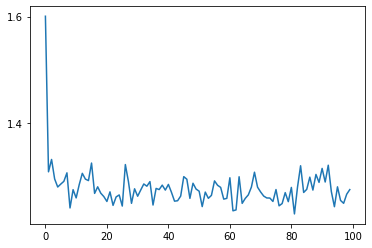

In [11]:
optim = torch.optim.Adam(list(my_dense.parameters())+list(my_lstm.parameters()), lr=0.001)
criterion = nn.CrossEntropyLoss().cuda()
num_of_epochs=50
batch_size=1024
steps=len(words_clean)//batch_size
gold=Variable(torch.FloatTensor(labels)).cuda()
print_every=10
plot_every=10
# lr_decay=50
plot_losses = []
for epoch in tqdm(range(num_of_epochs)):
#     if epoch %lr_decay==0 and epoch>0:
#         learning_rate=learning_rate/10
#         optim = torch.optim.Adam(list(my_dense.parameters())+list(my_lstm.parameters()), lr=learning_rate)
    epoch_loss=0.0
    cnt=0
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every
    epoch_loss=0
    
    shuffled_indcs=torch.randperm(len(words_clean))
    num=0
    for s in range(steps):
        optim.zero_grad()
        input_to_lstm=Variable(torch.zeros(sequence_length,batch_size,input_embedding_size)).cuda()
        gold_batch=Variable(torch.zeros(batch_size).long()).cuda()
        i=0
        
        while i<batch_size:
            if num==len(words_clean):
                num=0
            if len(words_clean[shuffled_indcs[num]])<sequence_length:
                for j in range( len(words_clean[shuffled_indcs[num]])):
                    if words_clean[shuffled_indcs[num].item()][j] in weight_indcs:
                        ind=weight_indcs[words_clean[shuffled_indcs[num].item()][j]]
                        input_to_lstm[j,i,:]=(torch.cuda.FloatTensor(weights_matrix[ind]))
                        
                gold_batch[i]=gold[shuffled_indcs[num]]
                i +=1
            num+=1

        hidden_sequence=my_lstm(input_to_lstm)
        preds=my_dense(hidden_sequence[0][sequence_length-1])
        loss = criterion(preds,gold_batch).cuda()
        print_loss_total += loss.item()
        plot_loss_total += loss.item()
        cnt+=1
        epoch_loss += loss.item()
        
        loss.backward()
        optim.step()
        
        
#         if s % print_every == 0:
#             print_loss_avg = print_loss_total / cnt
#             print_loss_total = 0
#             print("iter:",s,"loss:", print_loss_avg)

        if s % plot_every == 0:
            plot_loss_avg = plot_loss_total / cnt
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
            cnt=0
    print("in epoch", epoch, "print", epoch_loss/steps)
showPlot(plot_losses)

In [12]:
#validation
l=len(words_clean_val)
gold_val=Variable(torch.FloatTensor(labels_val)).cuda()
input_to_lstm=Variable(torch.zeros(sequence_length,l,input_embedding_size)).cuda()
gold_batch=Variable(torch.zeros(l).long()).cuda()
for i in range(l):
            
    if len(words_clean_val[i])<sequence_length:
        for j in range(len(words_clean_val[i])):
            if words_clean_val[i][j] in weight_indcs:
                ind=weight_indcs[words_clean_val[i][j]]
                input_to_lstm[j,i,:]=(torch.cuda.FloatTensor(weights_matrix[ind]))

        gold_batch[i]=gold_val[i]

hidden_sequence=my_lstm(input_to_lstm)
preds=my_dense(hidden_sequence[0][sequence_length-1])

acc=0
for i in range(l):
#     print("pred:",preds[i].topk(1).indices.item(),"label:", int(gold_val[i].item()))
    
#     print('\n')
    if preds[i].topk(1).indices.item()==int(gold_val[i].item()):
        acc +=1
print("accuracy = ", acc/l)

accuracy =  0.445
